In [1]:
# Example corner plots containing multiple distributions. 
# This example uses python 3
# See the README file for extra documentation for in-depth details on the specific formatting of the corner plots
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
# Random data sets to use
rand1x = np.random.normal(100.0, 15.0, 10000)
rand1y = np.random.normal(100.0, 15.0, 10000)
randset1 = np.vstack((rand1x, rand1y)).T

rand2x = np.random.normal(200.0, 15.0, 10000)
rand2y = np.random.normal(200.0, 15.0, 10000)
randset2 = np.vstack((rand2x, rand2y)).T

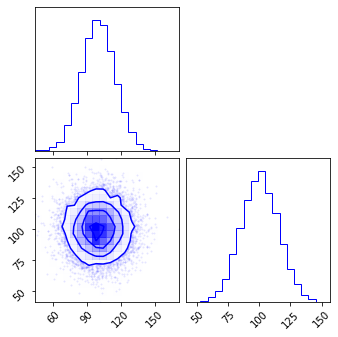

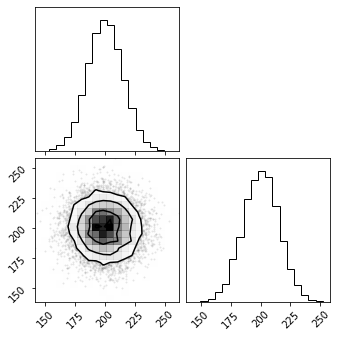

In [3]:
# Basic example of how to plot each distribution individually
corner.corner(randset1, color='b')
corner.corner(randset2)
plt.show()

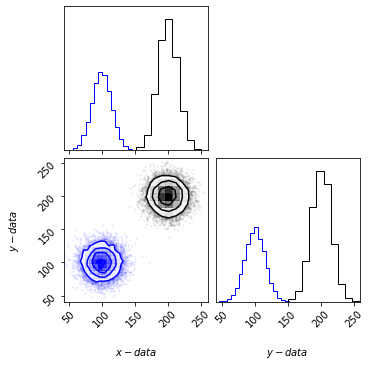

In [4]:
# Basic example showing both data sets together in one corner plot
example_fig = corner.corner(randset1, color='b')
corner.corner(randset2, range=[(np.min(rand1x),np.max(rand2x)), (np.min(rand1y),np.max(rand2y))], 
              labels=["$x-data$", "$y-data$"], fig=example_fig)
plt.show()

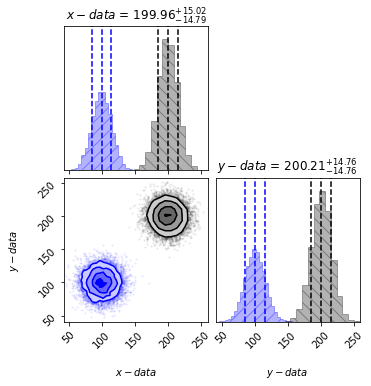

In [5]:
# Useful things to include to customize the plots
# color, bins, fill_contours, quantiles, hist_kwargs must be specified within both corner.corner() functions
example_fig2 = corner.corner(randset1, bins=25, show_titles=True, fill_contours=True, quantiles=[0.16, 0.5, 0.84], 
                             hist_kwargs={'hatch':'//', 'alpha':0.3, 'fill':True}, color='b')
corner.corner(randset2, range=[(np.min(rand1x),np.max(rand2x)), (np.min(rand1y),np.max(rand2y))], bins=25, 
              labels=["$x-data$", "$y-data$"], show_titles=True, fill_contours=True, quantiles=[0.16, 0.5, 0.84], 
              hist_kwargs={'hatch':'\\\\', 'alpha':0.3, 'fill':True}, fig=example_fig2)
plt.show()
# Note how it is not possible to see the titles for both data set 1 and data set 2.
# When show_titles=True in both corner.corner() functions, it is only applied to the second distribution

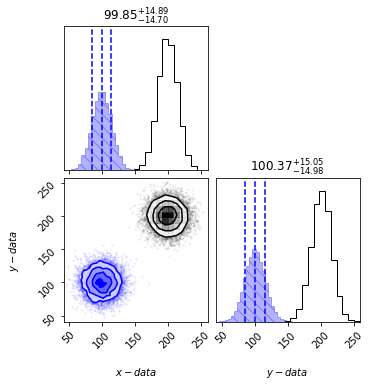

In [6]:
# Example of when parameters controlling the appearance of indivdual data sets 
# are only applied to one corner.corner() function
example_fig3 = corner.corner(randset1, bins=25, show_titles=True, fill_contours=True, quantiles=[0.16, 0.5, 0.84], 
                             hist_kwargs={'hatch':'\\\\', 'alpha':0.3, 'fill':True}, color='b')
corner.corner(randset2, range=[(np.min(rand1x),np.max(rand2x)), (np.min(rand1y),np.max(rand2y))], bins=25, 
              labels=["$x-data$", "$y-data$"], fig=example_fig3)
plt.show()

In [7]:
# It is not possible to display the median with uncertainties for both data sets with show_titles=True
# However, we can compute the values ourselves and put them on the plot manually
def mean_confidence_interval(data, confidence=84):
    neg_err, mean, pos_err = np.percentile(data, [100-confidence, 50, confidence])
    return mean, mean-neg_err, pos_err-mean # mean, lower err, upper err

In [8]:
print("Median value, lower error, upper error")
print("Data Set 1x:", mean_confidence_interval(rand1x))
print("Data Set 1y:", mean_confidence_interval(rand1y))
print("Data Set 2x:", mean_confidence_interval(rand2x))
print("Data Set 2y:", mean_confidence_interval(rand2y))

Median value, lower error, upper error
Data Set 1x: (99.8496066906219, 14.697057132966165, 14.892291062046567)
Data Set 1y: (100.36827327884994, 14.979246753798236, 15.046121747783829)
Data Set 2x: (199.95543627431147, 14.786424898645066, 15.019927683957633)
Data Set 2y: (200.210897193615, 14.762277324321218, 14.761544773583836)


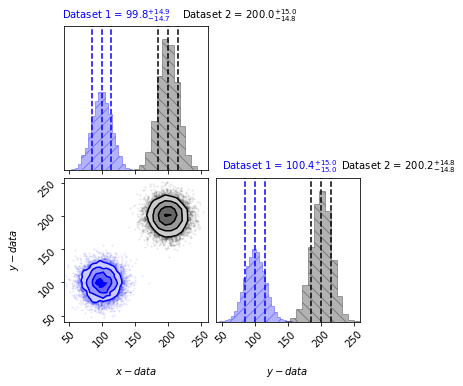

In [9]:
# Same as above but with titles manally added using plt.text()
example_fig4 = corner.corner(randset1, bins=25, fill_contours=True, quantiles=[0.16, 0.5, 0.84], 
              hist_kwargs={'hatch':'//', 'alpha':0.3, 'fill':True}, color='b')
corner.corner(randset2, range=[(np.min(rand1x),np.max(rand2x)), (np.min(rand1y),np.max(rand2y))], bins=25, 
              labels=["$x-data$", "$y-data$"], fill_contours=True, quantiles=[0.16, 0.5, 0.84], 
              hist_kwargs={'hatch':'\\\\', 'alpha':0.3, 'fill':True}, fig=example_fig4)
plt.text(-190, 5200, r'Dataset 1 = $%.1f_{-%.1f}^{+%.1f}$' % (mean_confidence_interval(rand1x)), color='b')
plt.text(-10, 5200, r'Dataset 2 = $%.1f_{-%.1f}^{+%.1f}$' % (mean_confidence_interval(rand2x)))
plt.text(50, 2600, r'Dataset 1 = $%.1f_{-%.1f}^{+%.1f}$' % (mean_confidence_interval(rand1y)), color='b')
plt.text(230, 2600, r'Dataset 2 = $%.1f_{-%.1f}^{+%.1f}$' % (mean_confidence_interval(rand2y)))
plt.show()